<H3>CUSTOMER SATISFACTION ON AIRLINES : YES/NO  (BINARY CLASSIFICATION SUPERVISED ML ) </H3>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
# based on all columns we have to find the satidfaction of the customer on airlines.

In [4]:
# HERE Y = SATISFACTION COLUMN AND OTHER COLUMNS ARE X.
# Y IS DEPEND ON X VARIABLE.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [6]:
df.shape

(103904, 12)

In [7]:
# duplicates checkout
df.duplicated().sum()

np.int64(172)

In [8]:
# check missing value
df.isnull().sum()                  # arrival delay m 310 missing value h 

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [9]:
# to hnadle missing value we have two options 1. is remove and 2. is fillna

In [10]:
df.dropna(inplace=True)    # remove all missing value because there are 310 less value 

In [11]:
df.isnull().sum()         # now missing value are drop (remove)

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [12]:
# now alphabetical columns ko convert krna h in numerical form because ml read only 0 to9 number

In [13]:
df[df['satisfaction']=='satisfied'].value_counts().sum()

np.int64(44897)

In [14]:
df[df['satisfaction']=='neutral or dissatisfied'].value_counts().sum()

np.int64(58697)

In [15]:
female=df[df['Gender']=='Female']
male=df[df['Gender']=='Male']

In [16]:
female.shape , male.shape

((52576, 12), (51018, 12))

In [17]:
male['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    28590
satisfied                  22428
Name: count, dtype: int64

In [18]:
female['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    30107
satisfied                  22469
Name: count, dtype: int64

In [19]:
female['Type of Travel'].value_counts()

Type of Travel
Business travel    36433
Personal Travel    16143
Name: count, dtype: int64

In [20]:
male['Type of Travel'].value_counts()

Type of Travel
Business travel    35032
Personal Travel    15986
Name: count, dtype: int64

In [21]:
female['Class'].value_counts()

Class
Business    24868
Eco         23776
Eco Plus     3932
Name: count, dtype: int64

In [22]:
male['Class'].value_counts()

Class
Business    24665
Eco         22817
Eco Plus     3536
Name: count, dtype: int64

In [23]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [24]:
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

<Axes: xlabel='Customer Type', ylabel='count'>

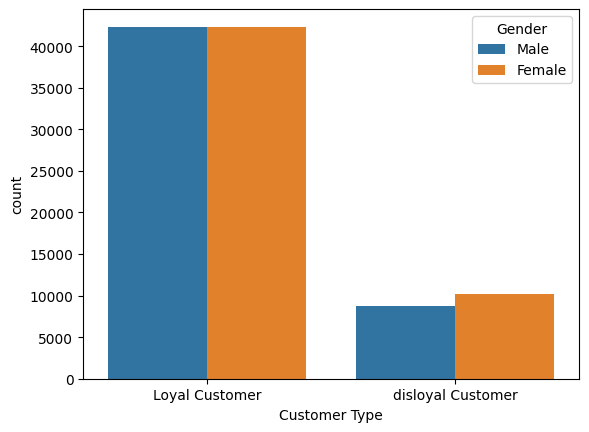

In [25]:
sns.countplot(x="Customer Type",data=df,hue='Gender')

<Axes: xlabel='satisfaction', ylabel='count'>

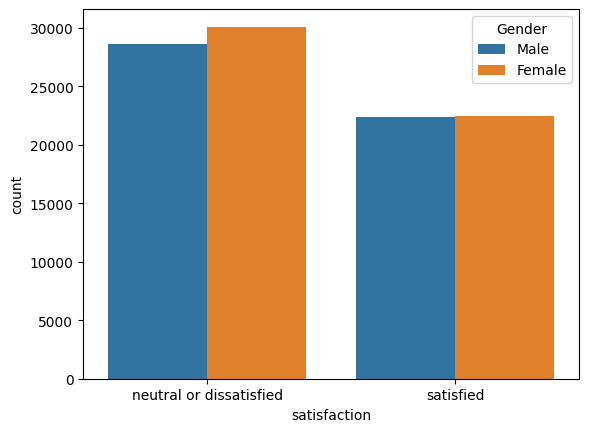

In [26]:
sns.countplot(x="satisfaction",data=df,hue='Gender')

<Axes: xlabel='Type of Travel', ylabel='count'>

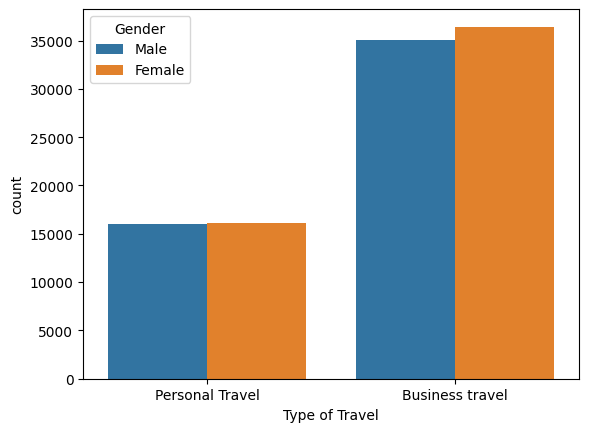

In [27]:
sns.countplot(x="Type of Travel",data=df,hue='Gender')

<Axes: xlabel='Class', ylabel='count'>

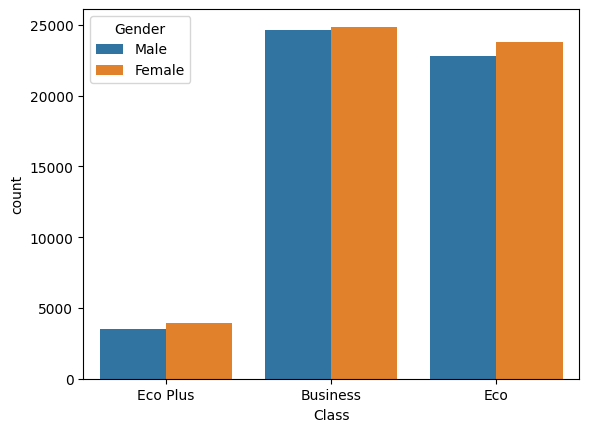

In [28]:
sns.countplot(x="Class",data=df,hue='Gender')

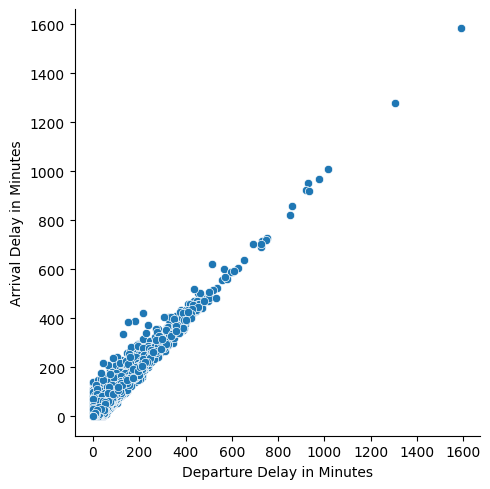

In [29]:
sns.relplot(x="Departure Delay in Minutes",y="Arrival Delay in Minutes",data=df)
# it shows linear ya positive relationship

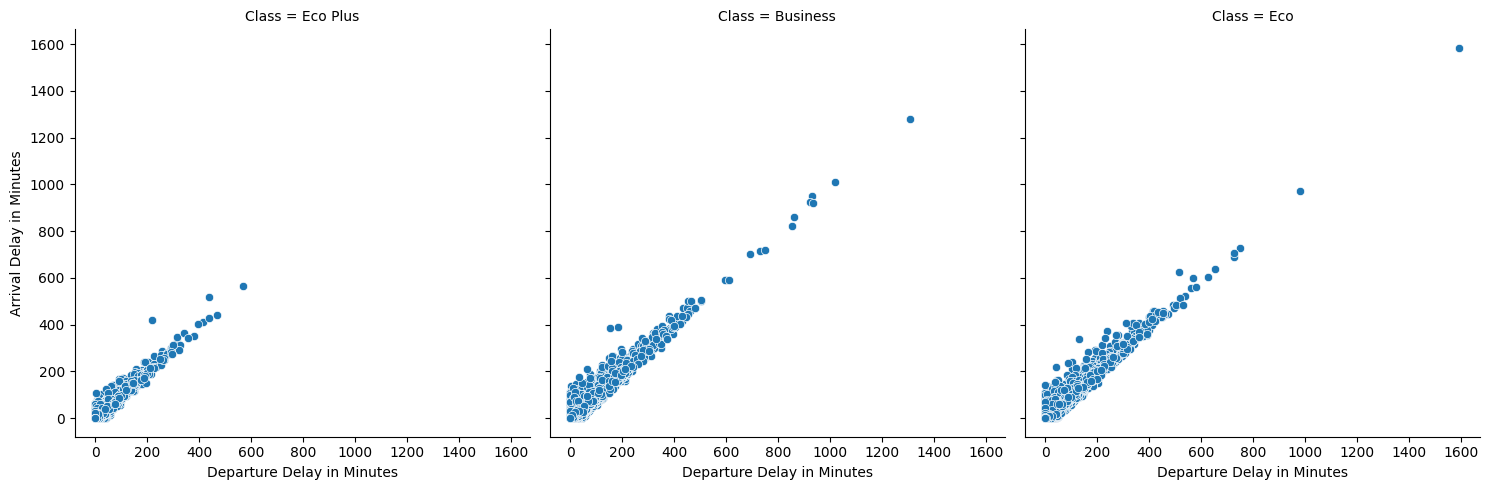

In [30]:
sns.relplot(x="Departure Delay in Minutes",y="Arrival Delay in Minutes",data=df,col='Class')
# it shows linear ya positive relationship

In [31]:
df['Class'].value_counts()  # 

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [32]:
df['Age'].min()

np.int64(7)

In [33]:
df['Age'].max()

np.int64(85)

In [34]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


<Axes: xlabel='Age', ylabel='Count'>

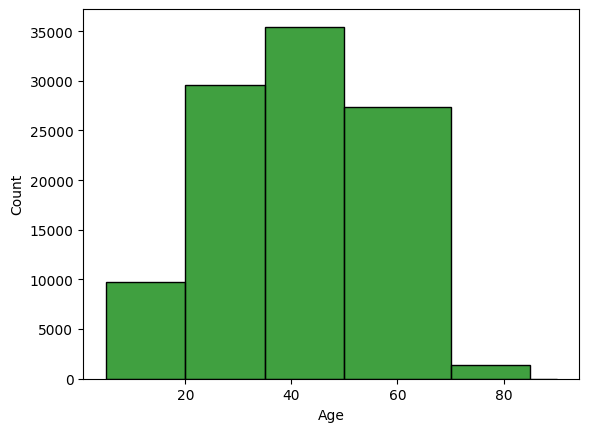

In [35]:
sns.histplot(df['Age'],bins=[5,20,35,50,70,85,90],color='g') # distribution 

<Axes: xlabel='Inflight entertainment', ylabel='count'>

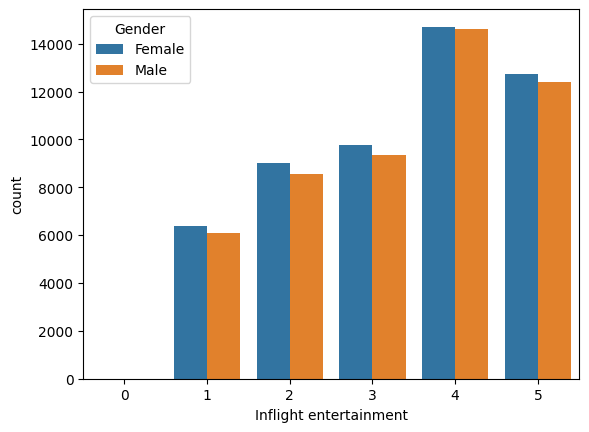

In [36]:
sns.countplot(x="Inflight entertainment",data=df,hue='Gender')

<Axes: xlabel='Baggage handling', ylabel='count'>

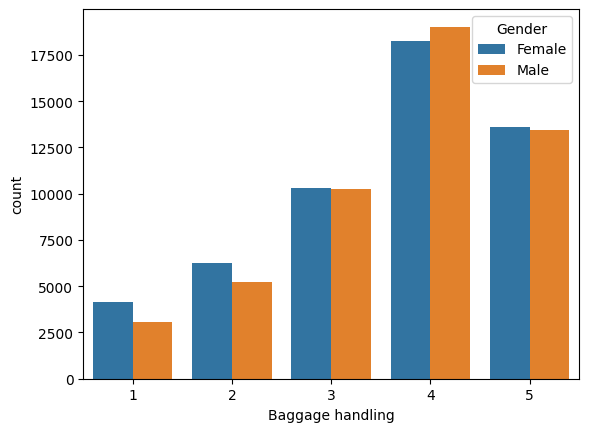

In [37]:
sns.countplot(x="Baggage handling",data=df,hue='Gender')

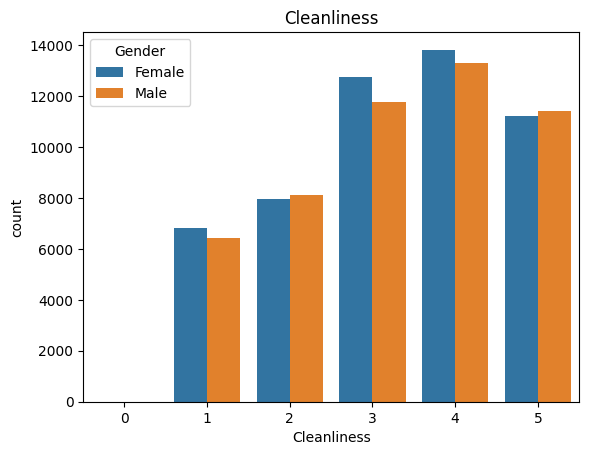

In [38]:
sns.countplot(x="Cleanliness",data=df,hue='Gender')
plt.title("Cleanliness")
plt.show()

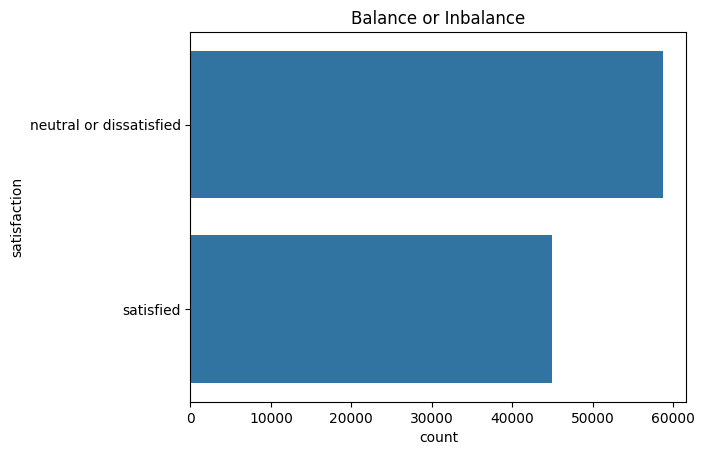

In [39]:
sns.countplot(df['satisfaction'])
plt.title("Balance or Inbalance")
plt.show()

In [40]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder ,OrdinalEncoder

In [42]:

pd.get_dummies(df)             # onehot encoding


,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18.0,False,True,True,False,False,True,False,False,True,True,False
1,25,235,1,3,1,1,6.0,False,True,False,True,True,False,True,False,False,True,False
2,26,1142,5,4,5,0,0.0,True,False,True,False,True,False,True,False,False,False,True
3,25,562,2,3,2,11,9.0,True,False,True,False,True,False,True,False,False,True,False
4,61,214,3,4,3,0,0.0,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0.0,True,False,False,True,True,False,False,True,False,True,False
103900,49,2347,5,5,4,0,0.0,False,True,True,False,True,False,True,False,False,False,True
103901,30,1995,4,4,4,7,14.0,False,True,False,True,True,False,True,False,False,True,False
103902,22,1000,1,1,1,0,0.0,True,False,False,True,True,False,False,True,False,True,False


In [43]:
pd.get_dummies(df).astype(int)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18,0,1,1,0,0,1,0,0,1,1,0
1,25,235,1,3,1,1,6,0,1,0,1,1,0,1,0,0,1,0
2,26,1142,5,4,5,0,0,1,0,1,0,1,0,1,0,0,0,1
3,25,562,2,3,2,11,9,1,0,1,0,1,0,1,0,0,1,0
4,61,214,3,4,3,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,1,0,0,1,1,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,0,1,1,0,1,0,1,0,0,0,1
103901,30,1995,4,4,4,7,14,0,1,0,1,1,0,1,0,0,1,0
103902,22,1000,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0


In [44]:
df2=pd.get_dummies(df,drop_first="if_binary").astype(int)  # gender female column ht jayega

In [45]:
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [46]:
df2.isnull().sum()

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

In [47]:
x=df2.drop('satisfaction_satisfied',axis='columns')  # supervised learning m data ko divide krna hota h x m and y=target or dependent variable m
y=df2[['satisfaction_satisfied']]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lgr=LogisticRegression()

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [53]:
print(lgr.score(x_train,y_train))
print(lgr.score(x_test,y_test))

0.7963559577677225
0.7983010763067716


In [54]:
print( "TRAINING SCORE:",lgr.score(x_train,y_train)*100)
print( "TESTING SCORE:",lgr.score(x_test,y_test)*100)

TRAINING SCORE: 79.63559577677225
TESTING SCORE: 79.83010763067716


In [55]:
prediction=lgr.predict(x_test)

In [56]:
x_test.shape

(20719, 12)

In [57]:
prediction

array([0, 1, 1, ..., 1, 1, 0])

In [58]:
y_test['PREDICTION']=prediction

In [59]:
y_test.head(40)  # model evaluation phase = to understand the performance of model

,satisfaction_satisfied,PREDICTION
10341,0,0
27798,0,1
49651,0,1
60170,1,0
65696,0,1
89173,1,0
65086,0,0
28416,1,1
86451,1,1
68117,1,1


In [60]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
86289,10,224,2,4,2,95,94,0,0,1,1,0
99837,42,361,2,4,2,0,0,1,1,0,0,0
45204,22,707,1,5,1,0,0,0,1,0,0,0
11610,22,557,1,4,1,73,68,1,0,0,0,0
70766,49,1067,5,5,5,25,22,1,0,0,0,0


In [61]:
x_train.shape

(82875, 12)

In [62]:
y_test.shape

(20719, 2)

In [63]:
y_test

,satisfaction_satisfied,PREDICTION
10341,0,0
27798,0,1
49651,0,1
60170,1,0
65696,0,1
...,...,...
39872,1,0
22575,1,0
6716,0,1
13142,1,1


In [64]:
# used to check the performance of model
from sklearn.metrics import confusion_matrix,classification_report
# confusion_matrix(actual,PREDICTION)
matrix=confusion_matrix(y_test['satisfaction_satisfied'],	y_test['PREDICTION'])
# it give 2d matrix 


In [65]:
# aray contain TP,FP,FN,TN = ache model ke liye TP,TN dono high hona chaiye and FP,FN less hona chaiye 
# tp=true positive (1,1), tn = truve negative (0,0),fn=false negative(1,0),fp=(0,1)
# 

Text(0.5, 1.0, 'CONFUSION MATRIX')

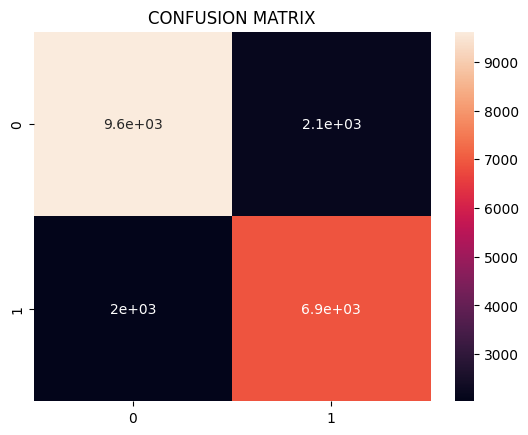

In [66]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(matrix,annot=True)     # fmt used to convert values into 'd' (deciml)
plt.title("CONFUSION MATRIX")
     # ye 0 and 1 ko hta deta h 

(np.float64(0.0), np.float64(2.0), np.float64(2.0), np.float64(0.0))

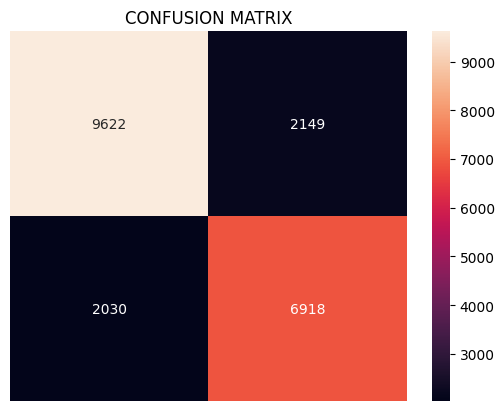

In [67]:
sns.heatmap(matrix,annot=True,fmt='d')     # fmt used to convert values into 'd' (deciml)
plt.title("CONFUSION MATRIX")
plt.axis("off")    # used to remove 0 and 1

In [68]:
import os
import joblib

In [69]:
os.makedirs("models",exist_ok=True)
joblib.dump(lgr,'./models/logisticregre.lb')
print("Your model is saved")

Your model is saved


In [70]:
print(classification_report(y_test['satisfaction_satisfied'],	y_test['PREDICTION']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11771
           1       0.76      0.77      0.77      8948

    accuracy                           0.80     20719
   macro avg       0.79      0.80      0.79     20719
weighted avg       0.80      0.80      0.80     20719

